#Medical Research


Download dataset

In [63]:
!wget -O drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv

--2024-01-05 15:35:49--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5.9K) [text/csv]
Saving to: ‘drug200.csv’

drug200.csv         100%[===================>]   5.89K  --.-KB/s    in 0s      

2024-01-05 15:35:49 (1.49 GB/s) - ‘drug200.csv’ saved [6027/6027]



##STEP-1: Importing Libraries & Data Set

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
from sklearn import datasets

In [65]:
#Read the Data
df=pd.read_csv("/content/drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [67]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

#STEP-2:Exploratory Data Analysis(EDA)


<Axes: xlabel='Age', ylabel='Density'>

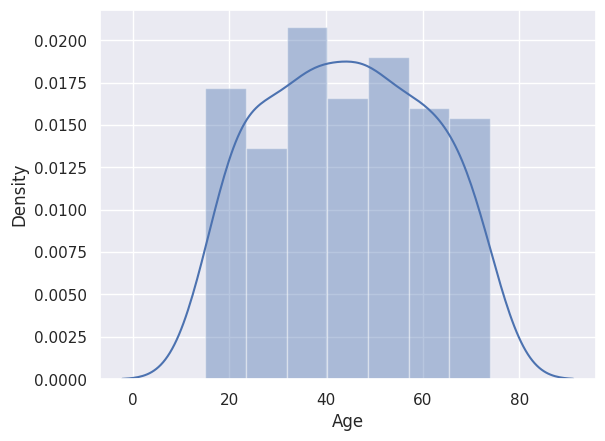

In [68]:
#1. Age of the patients
sns.distplot(df['Age'])

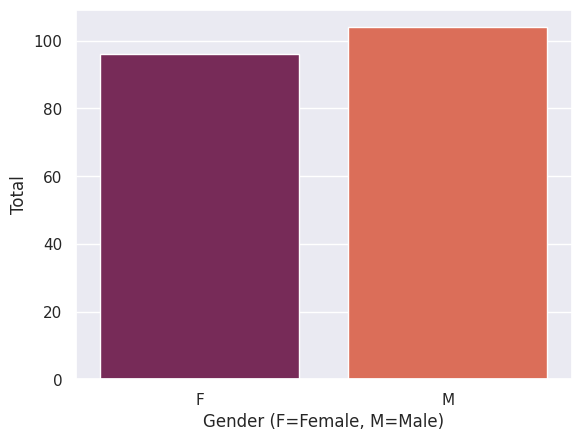

In [69]:
#2. Gender Distribution

sns.set_theme(style="darkgrid")
sns.countplot(x="Sex", data=df , palette="rocket")
plt.xlabel('Gender (F=Female, M=Male)')
plt.ylabel('Total')
plt.show()

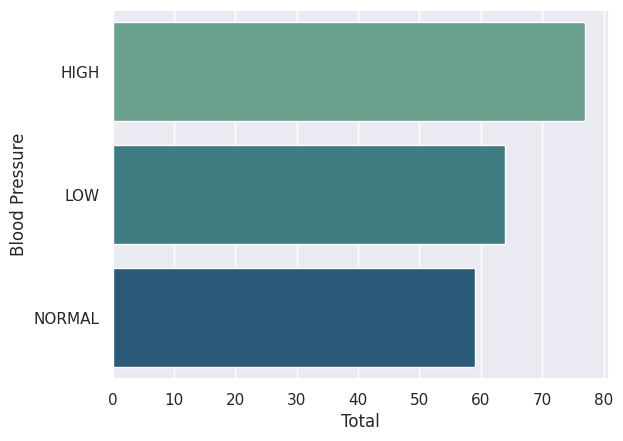

In [70]:

# 3. Blood pressure of patients


sns.set_theme(style="darkgrid")
sns.countplot(y="BP", data=df, palette="crest")
plt.ylabel('Blood Pressure')
plt.xlabel('Total')
plt.show()

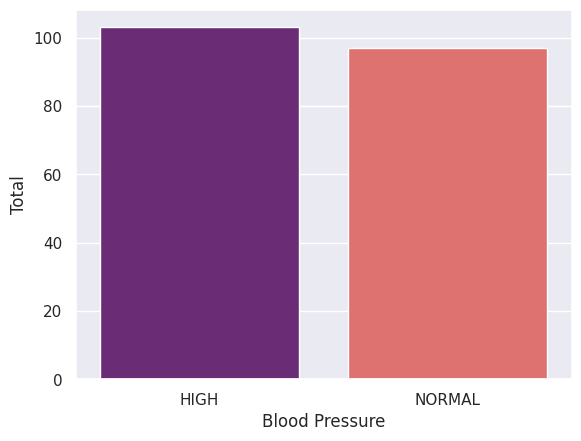

In [71]:
# 4. Cholesterol of the patients

sns.set_theme(style="darkgrid")
sns.countplot(x="Cholesterol", data=df, palette="magma")
plt.xlabel('Blood Pressure')
plt.ylabel('Total')
plt.show()

Maximum Sodium-Potassium ratio: 38.247
Minimum Sodium-Potassium ratio: 6.269


<Axes: xlabel='Na_to_K', ylabel='Density'>

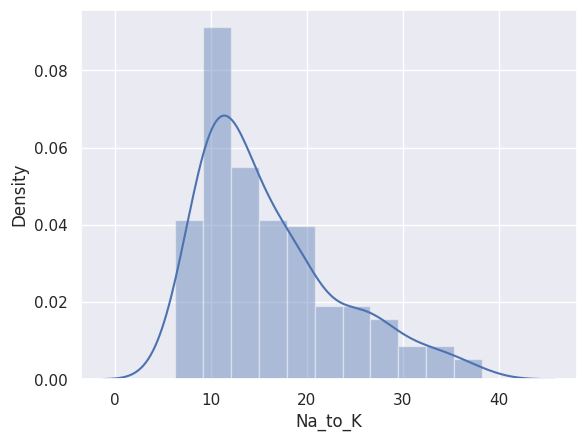

In [72]:
# 5. Sodium-Potassium ratio in patient's blood

print("Maximum Sodium-Potassium ratio:",df.Na_to_K.max())
print("Minimum Sodium-Potassium ratio:",df.Na_to_K.min())
sns.distplot(df.Na_to_K)

In [73]:
#6.drug value count

df.Drug.value_counts()


drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

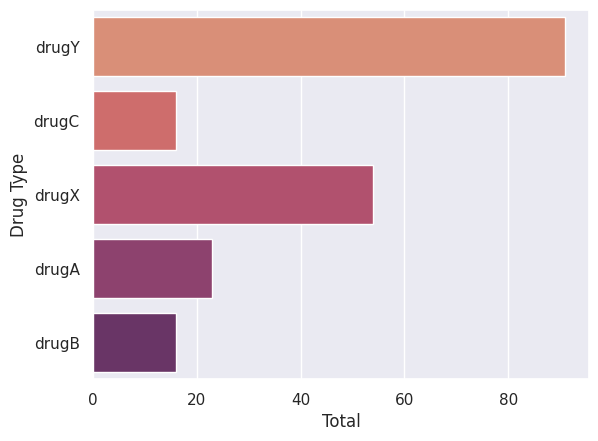

In [74]:
sns.set_theme(style="darkgrid")
sns.countplot(y="Drug", data=df, palette="flare")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()


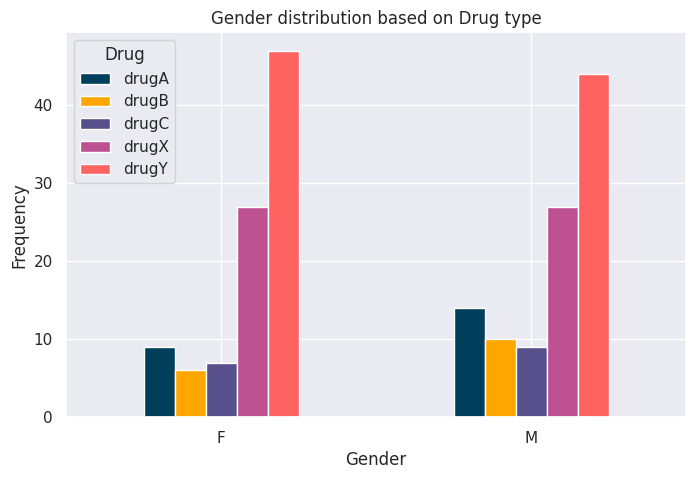

In [75]:
# 7. Gender Distribution based on Drug Type

pd.crosstab(df.Sex,df.Drug).plot(kind="bar",figsize=(8,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

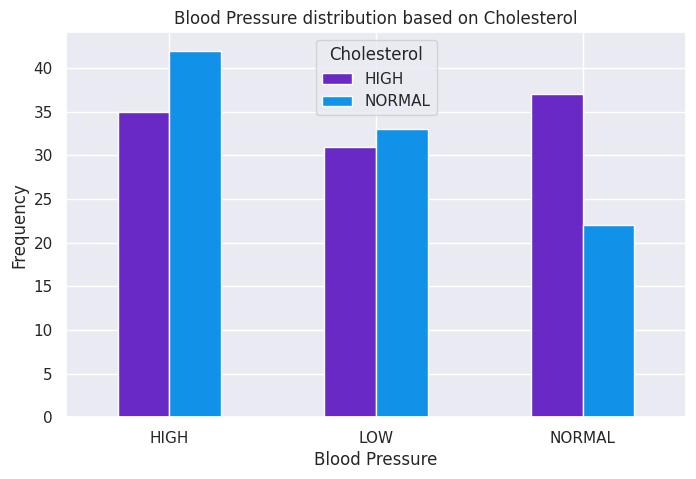

In [76]:
# 8. Blood Pressure Distribution based on Cholesetrol

pd.crosstab(df.BP,df.Cholesterol).plot(kind="bar",figsize=(8,5),color=['#6929c4','#1192e8'])
plt.title('Blood Pressure distribution based on Cholesterol')
plt.xlabel('Blood Pressure')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

In [77]:
#Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
import pandas as pd
data=pd.read_csv("/content/drug200.csv")
data.fillna(data.mean(),inplace=True)
label_encoder=LabelEncoder()
data['Sex']=label_encoder.fit_transform(data['Sex'])
print(data.head())

   Age  Sex      BP Cholesterol  Na_to_K   Drug
0   23    0    HIGH        HIGH   25.355  drugY
1   47    1     LOW        HIGH   13.093  drugC
2   47    1     LOW        HIGH   10.114  drugC
3   28    0  NORMAL        HIGH    7.798  drugX
4   61    0     LOW        HIGH   18.043  drugY


##STEP-3:Data Preprocessing / Clean the Data


In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
data=pd.read_csv("/content/drug200.csv")
#Split the data into features (X) and target variable (y)
X=data[['Age','Sex','BP','Cholesterol']]
y=data['Drug']

Splitting the dataset into the Training set and Test set

In [79]:
#split into training and testing test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (160, 4)
X_test shape: (40, 4)
y_train shape: (160,)
y_test shape: (40,)


##STEP-4 : Fit the Model & Predict , check the Accuracy

##Logistic Regression

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report
import numpy as np
import pandas as pd
df=pd.read_csv('/content/drug200.csv')
features=df[['Age','Sex','BP','Cholesterol']]
target=df['Drug']
features=pd.get_dummies(features,drop_first=True)
X_train, X_test, y_train, y_test=train_test_split(features,target,test_size=0.2,random_state=42)

In [81]:
# creating the model
model=LogisticRegression()
# feeding the training data to the model
model.fit(X_train,y_train)
# predicting the test set results
y_pred=model.predict(X_test)
#calculating accuracy
accuracy=accuracy_score(y_test,y_pred)
#classification report
report=classification_report(y_test,y_pred)
print("Logistic Regression Model Evaluation:")
print('Accuracy: {:.2f}%'.format(accuracy*100))
print("Classification Report:")
print(report)

Logistic Regression Model Evaluation:
Accuracy: 42.50%
Classification Report:
              precision    recall  f1-score   support

       drugA       0.00      0.00      0.00         6
       drugB       1.00      0.67      0.80         3
       drugC       0.50      0.20      0.29         5
       drugX       0.62      0.45      0.53        11
       drugY       0.35      0.60      0.44        15

    accuracy                           0.42        40
   macro avg       0.49      0.38      0.41        40
weighted avg       0.44      0.42      0.41        40



##Support Vector Machine

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train, X_test, y_train, y_test=train_test_split(features,target,test_size=0.2,random_state=42)
# creating the model
model=SVC(kernel='linear')
# feeding the training data to the model
model.fit(X_train,y_train)
# predicting the test set results
y_pred=model.predict(X_test)
#calculating accuracy
accuracy=accuracy_score(y_test,y_pred)
#classification report
report=classification_report(y_test,y_pred)
print("Support Vector Machine Model Evaluation:")
print('Accuracy: {:.2f}%'.format(accuracy*100))
print("Classification Report:")
print(report)


Support Vector Machine Model Evaluation:
Accuracy: 50.00%
Classification Report:
              precision    recall  f1-score   support

       drugA       0.00      0.00      0.00         6
       drugB       1.00      0.67      0.80         3
       drugC       1.00      0.20      0.33         5
       drugX       0.62      0.45      0.53        11
       drugY       0.41      0.80      0.55        15

    accuracy                           0.50        40
   macro avg       0.61      0.42      0.44        40
weighted avg       0.53      0.50      0.45        40



#Decision Tree

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test=train_test_split(features,target,test_size=0.2,random_state=42)
# creating the model
model=DecisionTreeClassifier()
# feeding the training data to the model
model.fit(X_train,y_train)
# predicting the test set results
y_pred=model.predict(X_test)
#calculating accuracy
accuracy=accuracy_score(y_test,y_pred)
#classification report
report=classification_report(y_test,y_pred)
print("Decision Tree Model Evaluation:")
print('Accuracy: {:.2f}%'.format(accuracy*100))
print("Classification Report:")
print(report)


Decision Tree Model Evaluation:
Accuracy: 60.00%
Classification Report:
              precision    recall  f1-score   support

       drugA       0.75      0.50      0.60         6
       drugB       0.67      0.67      0.67         3
       drugC       0.75      0.60      0.67         5
       drugX       0.70      0.64      0.67        11
       drugY       0.47      0.60      0.53        15

    accuracy                           0.60        40
   macro avg       0.67      0.60      0.63        40
weighted avg       0.63      0.60      0.61        40



##Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test=train_test_split(features,target,test_size=0.2,random_state=42)
# creating the model
model=RandomForestClassifier()
# feeding the training data to the model
model.fit(X_train,y_train)
# predicting the test set results
y_pred=model.predict(X_test)
#calculating accuracy
accuracy=accuracy_score(y_test,y_pred)
#classification report
report=classification_report(y_test,y_pred)
print("Random Forest Model Evaluation:")
print('Accuracy: {:.2f}%'.format(accuracy*100))
print("Classification Report:")
print(report)


Random Forest Model Evaluation:
Accuracy: 55.00%
Classification Report:
              precision    recall  f1-score   support

       drugA       0.75      0.50      0.60         6
       drugB       1.00      0.67      0.80         3
       drugC       0.67      0.40      0.50         5
       drugX       0.60      0.55      0.57        11
       drugY       0.43      0.60      0.50        15

    accuracy                           0.55        40
   macro avg       0.69      0.54      0.59        40
weighted avg       0.60      0.55      0.56        40



#K-Nearest Neighbors (KNN)

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test=train_test_split(features,target,test_size=0.2,random_state=42)
#creating the model & fit
model=KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
print("K-Nearest Neighbors Model Evaluation:")
print('Accuracy: {:.2f}%'.format(accuracy*100))
print("Classification Report:")
print(report)

K-Nearest Neighbors Model Evaluation:
Accuracy: 35.00%
Classification Report:
              precision    recall  f1-score   support

       drugA       0.25      0.17      0.20         6
       drugB       0.33      0.33      0.33         3
       drugC       0.50      0.20      0.29         5
       drugX       0.33      0.27      0.30        11
       drugY       0.36      0.53      0.43        15

    accuracy                           0.35        40
   macro avg       0.36      0.30      0.31        40
weighted avg       0.35      0.35      0.34        40



#Naive Bayes Classifier

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test=train_test_split(features,target,test_size=0.2,random_state=42)
#creating the model & fit
model=GaussianNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
print("Naive Bayes Classifier Model Evaluation:")
print('Accuracy: {:.2f}%'.format(accuracy*100))
print("Classification Report:")
print(report)

Naive Bayes Classifier Model Evaluation:
Accuracy: 60.00%
Classification Report:
              precision    recall  f1-score   support

       drugA       0.50      1.00      0.67         6
       drugB       1.00      1.00      1.00         3
       drugC       0.83      1.00      0.91         5
       drugX       0.62      0.45      0.53        11
       drugY       0.45      0.33      0.38        15

    accuracy                           0.60        40
   macro avg       0.68      0.76      0.70        40
weighted avg       0.60      0.60      0.58        40



Compare and evaluate the Model results and find the best model